In [1]:
# !pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 70kB/s 
     |████████████████████████████████| 3.8MB 1.2MB/s 
     |████████████████████████████████| 450kB 915kB/s 
ERROR: tensorflow 1.15.0rc3 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0rc3 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from PIL import Image
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input

import matplotlib.pylab as plt
%matplotlib inline

## kaggleデータのインポート

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"norihisa","key":"d016ea67c3249f44d2090f6c16a2ade1"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!pip install kaggle

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
!kaggle competitions download -c cifar-10

  0% 0.00/3.04M [00:00<?, ?B/s]
100% 3.04M/3.04M [00:00<00:00, 100MB/s]
 98% 595M/610M [00:11<00:00, 45.6MB/s]
100% 610M/610M [00:11<00:00, 57.0MB/s]
 91% 95.0M/105M [00:01<00:00, 52.6MB/s]
100% 105M/105M [00:01<00:00, 57.7MB/s] 
  0% 0.00/575k [00:00<?, ?B/s]
100% 575k/575k [00:00<00:00, 80.6MB/s]


In [10]:
!apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [0]:
!p7zip -d *.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 639374249 bytes (610 MiB)

Extracting archive: test.7z
--
Path = test.7z
Type = 7z
Physical Size = 639374249
Headers Size = 1721070
Method = LZMA:26
Solid = +
Blocks = 1

  0%      0% - test/1.png                   0% 886 - test/100795.png                            0% 1319 - test/101184.png                             0% 1629 - test/101463.png                             0% 1841 - test/101654.png                             1% 1842 - test/101655.png

In [0]:
!ls

In [0]:
train_dir = '/content/drive/My Drive/colab/hix/0_micro_recognition/train'
val_dir = '/content/drive/My Drive/colab/hix/0_micro_recognition/val'

In [0]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (224, 224, 3))

94773248/94765736 [==============================] - 8s 0us/step


In [0]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    channel_shift_range=50,
    horizontal_flip=True,
    )

validationgen = ImageDataGenerator(
    rescale=1./255,
    )

In [0]:
train_generator = datagen.flow_from_directory(
  train_dir,
  target_size=(224,224),
  batch_size = 32,
  class_mode = 'categorical')

validation_generator = validationgen.flow_from_directory(
  val_dir,
  target_size=(224,224),
  batch_size = 32,
  class_mode = 'categorical')

Found 479 images belonging to 2 classes.
Found 69 images belonging to 2 classes.


In [0]:
from collections import Counter

counter = Counter(train_generator.classes)
max_val = float(max(counter.values()))
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}    

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(conv_base)

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 24,112,770
Trainable params: 24,059,650
Non-trainable params: 53,120
_______________________________________

In [0]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [0]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'conv5_block3_out':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False    

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=1e-5, decay=1e-6),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
history = model.fit_generator(train_generator,steps_per_epoch=7,
                              validation_data=validation_generator,
                              validation_steps=5,
                              class_weight=class_weights,
                              epochs = 50)

Epoch 1/50
7/7 [==============================] - 125s 18s/step - loss: 1.2008 - accuracy: 0.5357 - val_loss: 1.7426 - val_accuracy: 0.2556
Epoch 2/50
7/7 [==============================] - 61s 9s/step - loss: 1.0617 - accuracy: 0.5605 - val_loss: 1.6562 - val_accuracy: 0.2481
Epoch 3/50
7/7 [==============================] - 19s 3s/step - loss: 0.9624 - accuracy: 0.7054 - val_loss: 1.5945 - val_accuracy: 0.2556
Epoch 4/50
7/7 [==============================] - 8s 1s/step - loss: 0.9147 - accuracy: 0.6562 - val_loss: 1.6560 - val_accuracy: 0.2632
Epoch 5/50
7/7 [==============================] - 10s 1s/step - loss: 0.7225 - accuracy: 0.7534 - val_loss: 1.7600 - val_accuracy: 0.2707
Epoch 6/50
7/7 [==============================] - 9s 1s/step - loss: 0.6724 - accuracy: 0.7902 - val_loss: 1.8246 - val_accuracy: 0.2632
Epoch 7/50
7/7 [==============================] - 10s 1s/step - loss: 0.7671 - accuracy: 0.7444 - val_loss: 1.7996 - val_accuracy: 0.2707
Epoch 8/50
7/7 [==================

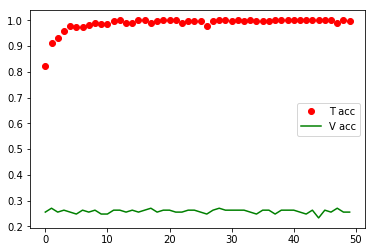

In [0]:
# 精度の履歴を可視化する。
ha = history.history['accuracy']
va = history.history['val_accuracy']
epochs = range(len(ha))
plt.plot(epochs, ha, 'ro', label='T acc')
plt.plot(epochs, va, 'g', label='V acc')
plt.legend();

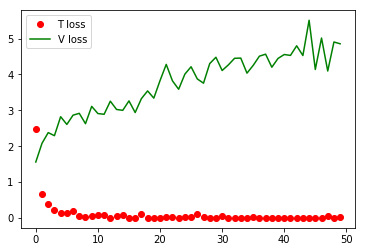

In [0]:
# 損失関数の履歴を可視化する。
ha = history.history['loss']
va = history.history['val_loss']
epochs = range(len(ha))
plt.plot(epochs, ha, 'ro', label='T loss')
plt.plot(epochs, va, 'g', label='V loss')
plt.legend();

In [0]:
# 評価
train_loss, train_acc = model.evaluate_generator(train_generator)
print(f"train loss: {train_loss:.2f}, train accuracy: {train_acc:.2%}")

test_loss, test_acc = model.evaluate_generator(validation_generator)
print(f"test loss: {test_loss:.2f}, test accuracy: {test_acc:.2%}")

train loss: 4.89, train accuracy: 27.85%
test loss: 4.73, test accuracy: 26.09%


In [0]:
# 推論する
class_names = list(validation_generator.class_indices.keys())

def plot_prediction(img, prediction, label):
    pred_label = np.argmax(prediction)

    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5), facecolor="w")

    ax1.imshow(img)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_xlabel(
        f"{class_names[pred_label]} {prediction[pred_label]:.2%} ({class_names[label]})",
        fontsize=15,
    )

    bar_xs = np.arange(len(class_names))  # 棒の位置
    ax2.bar(bar_xs, prediction)
    ax2.set_xticks(bar_xs)
    ax2.set_xticklabels(class_names, rotation="vertical", fontsize=15)

1


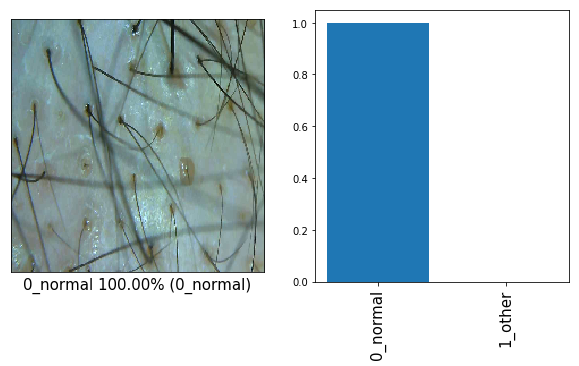

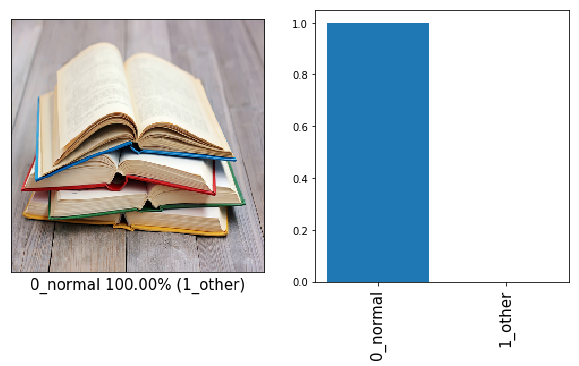

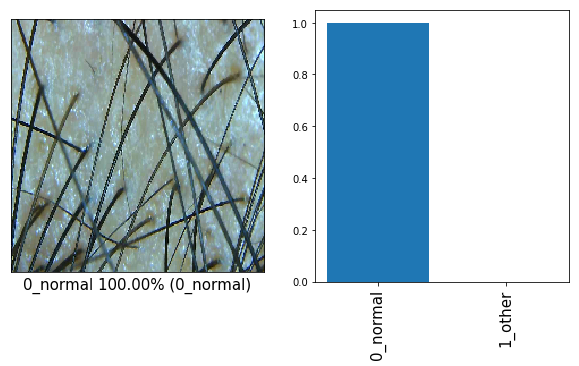

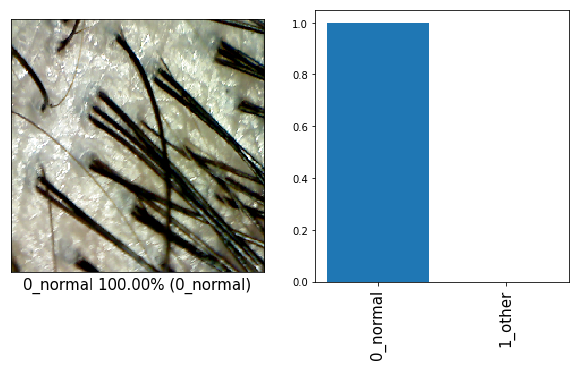

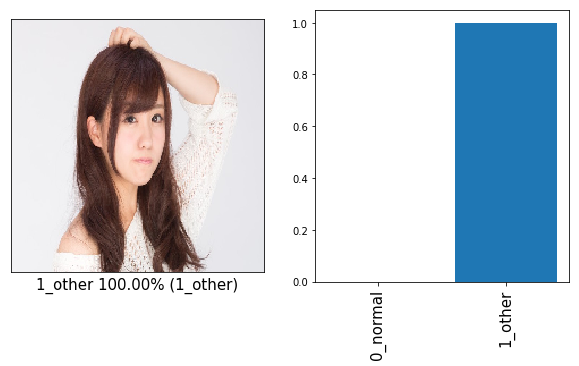

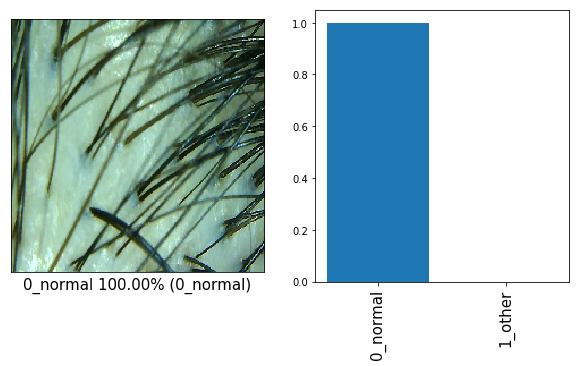

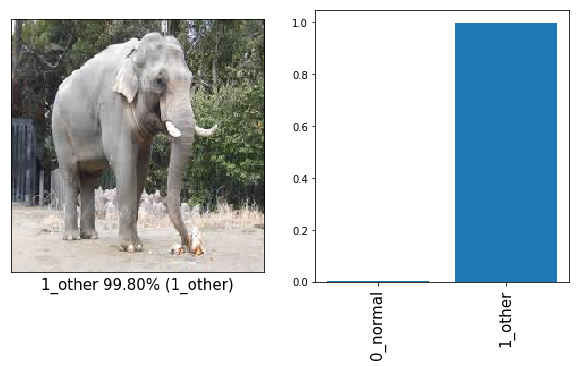

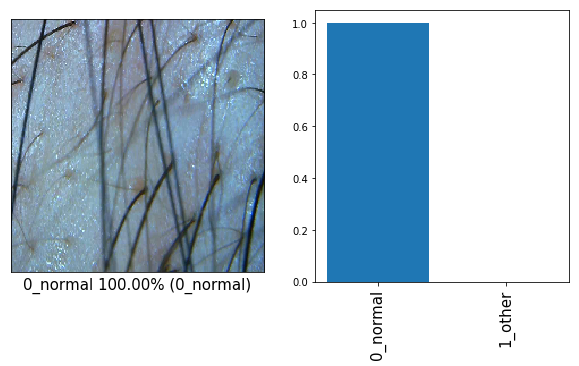

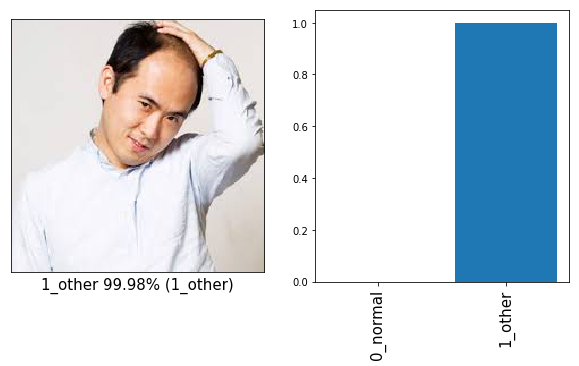

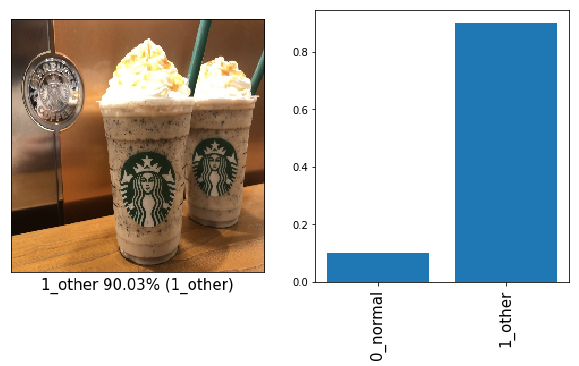

In [0]:
# バリデーションデータから3サンプル推論して、結果を表示する。

rnd_num = np.random.randint(len(validation_generator))
print(rnd_num)
for i in validation_generator.index_array[40:50]:
    img_path = validation_generator.filepaths[i]
    label = validation_generator.labels[i]

    # 画像を読み込む。
    img = Image.open(img_path)
    # モデルの入力サイズにリサイズする。
    img = img.resize(reversed(validation_generator.target_size))
    # PIL -> numpy 配列
    img = np.array(img)
    # バッチ次元を追加する。
    x = np.expand_dims(img, axis=0)
    # 前処理を行う。
    x = preprocess_input(x)

    # 推論する。
    prediction = model.predict(x)

    # 推論結果を可視化する。
    plot_prediction(img, prediction[0], label)

In [0]:
test_generator = testgen.flow_from_directory(
  test_dir,
  target_size=(224,224),
  class_mode = 'categorical')

Found 4 images belonging to 4 classes.


In [0]:
test_generator

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

NameError: ignored

In [0]:
import os

os.mkdir('param')

In [0]:
model.save('param/1_micro.h5')

In [0]:
predict_generator()

In [0]:
# 正常 ラベル0
img = image.load_img('/content/drive/My Drive/colab/hix/1_micro_condition/test/0_normal/20190806111539.jpg'
                      ,target_size=(224,224))
x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)

pred = model.predict(x)
pred.argmax()

0

In [0]:
# オイリー ラベル1
img = image.load_img('/content/drive/My Drive/colab/hix/1_micro_condition/test/1_oily/20190818121406.jpg'
                      ,target_size=(224,224))
x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)

pred = model.predict(x)
pred.argmax()

0

In [0]:
# フケ・乾燥 ラベル2
img = image.load_img('/content/drive/My Drive/colab/hix/1_micro_condition/test/2_dandruff/20190819122644.jpg'
                      ,target_size=(224,224))
x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)

pred = model.predict(x)
pred.argmax()

0

In [0]:
# 赤み・炎症 ラベル3
img = image.load_img('/content/drive/My Drive/colab/hix/1_micro_condition/test/3_inflammation/20190901172153.jpg'
                      ,target_size=(224,224))
x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)

pred = model.predict(x)
pred.argmax()

3

In [0]:
!python predict_1_micro.py '/content/drive/My Drive/colab/hix/1_micro_condition/test/2_dandruff/20190819122644.jpg'

python3: can't open file 'predict_1_micro.py': [Errno 2] No such file or directory


In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

In [0]:
print(history)